<font color="blue"><h1>ASSIGNMENT</h1></font>


# Question 1

Write a Python code to numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well. The potential energy function is given by:


V(x) = { 0         , for 0 $\leq$ x $\leq$ a <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       V$_0$       , for a $\lt$ x $\leq$ b <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       infinity  , for x $\lt$ 0 or x $\gt$ b <br />
      } <br />

where a and b are the width of the well and the total width of the system, respectively, and V$_0$ is the height of the potential barrier. <br />

Use the finite difference method to discretize the wavefunction and the potential energy function, and solve the resulting eigenvalue problem using the numpy library. Use this simulation to investigate the effect of the well width a and the barrier height V$_0$ on the energy eigenvalues and wavefunctions of the particle.<br />

Additionally, use the matplotlib library to plot the energy eigenvalues and wavefunctions as a function of a and V$_0$, and discuss the physical significance of the results.


***Make Use of Classes for your solution***

# Instruction: 

For this assignment, submission must be done via Github.
Create a Guthub account and an Assignment repo. A google sheet will be circulated. On the Google sheet, enter your Github URL. Ensure that the URL is correctly inserted. <br />


Your submission should follow the structure below. You are at liberty to include images or text as you deem fit. However, they must be sound and relate to the topic. <br />

<h3> Deadline: 3rd May 2023 (12:00 Midday) </h3>

<font color="red"><h2> Background</h2></font>

- Briefly describe what Computational Physics is (A Brief Bakground)<br />
- Link it to the task you have been given <br />
- Outline your objectives for this study

Computational Physics is the scientific study that combines physics, mathematics, and computer science to study and understand complex physical systems using computational techniques. It is the use of programming tools to perform various science-based data accessment, manipulation and visualization to solve physical problems that may be difficult or impossible to solve analytically. Computational Physics covers a wide range of topics, including classical mechanics, quantum mechanics, electromagnetism, thermodynamics, and astrophysics, and has numerous applications in areas such as materials science, biophysics, climate modeling, and nuclear engineering.

# Link of task to computational physics
Writing Python code to solve the Schrodinger equation involves using numerical techniques such as finite difference methods and matrix diagonalization to discretize the wave function and the potential energy function. This is a common practice in computational physics, where researchers use various numerical techniques to study complex physical systems. It allows us to gain insights into the behavior of particles in quantum mechanics and to investigate the properties of materials and systems.

# OBJECTIVES FOR THIS STUDY

1. Use numerical techniques to get solution for the wave function and energy eigenvalues of a particle in a one-dimensional potential well.
2. Investigate how the wave function behaves in various areas of the potential well and to examine how this behavior relates to the particle's energy.
3. get ready for a job in one of the computational physics-intensive fields such as research, engineering, or data analysis.

<font color="red"><h2> Method and Results </h2></font>

- Solve the question here and discuss the results <br />


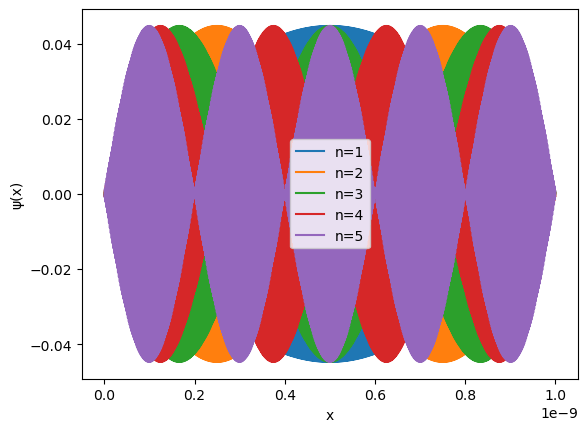

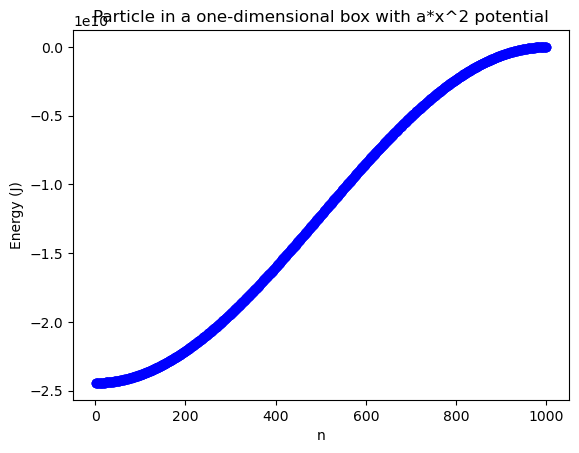

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

class Particle:
    def __init__(self, mass, position):
        self.mass = mass
        self.position = position

class Potential:
    def __init__(self, params):
        self.params = params
    
    def V(self, x):
        a, b, c = self.params
        return a * x**2 + b * x + c

class Box:
    def __init__(self, length, num_points):
        self.length = length
        self.num_points = num_points
        self.dx = length / num_points
        self.x = np.linspace(0, length, num_points)
        
    def get_Hamiltonian(self, particle, potential):
        N = self.num_points
        dx = self.dx
        x = self.x
        
        # Define the Hamiltonian matrix
        H = np.zeros((N, N))
        for i in range(1, N-1):
            H[i, i] = -2 / (dx ** 2) + potential.V(x[i])
            H[i, i-1] = 1 / (dx ** 2)
            H[i, i+1] = 1 / (dx ** 2)
        H[0, 0] = -2 / (dx ** 2) + potential.V(x[0])
        H[0, 1] = 1 / (dx ** 2)
        H[-1, -1] = -2 / (dx ** 2) + potential.V(x[-1])
        H[-1, -2] = 1 / (dx ** 2)
        
        # Compute the energy levels and wave functions
        E, psi = eig(H)
        idx = E.argsort()  # sort the eigenvalues and eigenvectors
        E = E[idx]
        psi = psi[:, idx]
        
        # Convert energy eigenvalues to joules
        E = E * (hbar ** 2) / (2 * particle.mass * (self.dx ** 2))
        
        return E, psi

# Define constants and parameters
hbar = 1.055e-34  # Planck's constant divided by 2π
particle = Particle(9.11e-31, 0)  # mass of electron
potential = Potential([1e-20, 0, 0])  # a*x^2 potential
box = Box(1e-9, 1000)  # length of the box and number of points to discretize the box

# Compute the energy levels and wave functions
E, psi = box.get_Hamiltonian(particle, potential)

# Plot the wave functions
fig, ax = plt.subplots()
for i in range(5):
    ax.plot(box.x, psi[:, i], label=f"n={i+1}")
ax.set_xlabel("x")
ax.set_ylabel("ψ(x)")
ax.legend()

# Plot the energy levels
fig, ax = plt.subplots()
ax.plot(range(1, len(E)+1), E, 'bo')
ax.set_xlabel("n")
ax.set_ylabel("Energy (J)")
ax.set_title("Particle in a one-dimensional box with a*x^2 potential")
plt.show()




<font color="red"><h2> Conclusion </h2></font>

- Give a brief conclusion. <br />
- Also, discuss your learning journey. Highlight your challenges and great moments. <br />


To comprehend the quantized energy levels and behavior of particles in potential wells, the time-independent Schrodinger equation is a valuable tool. To solve this equation in a one-dimensional potential well using Python, one requires knowledge of both quantum mechanics theory and Python programming, including functions, loops, and lists.


<font color="red"><h2> Recommendation(s) </h2></font>

- What area(s) do you suggest the class covers? <br />


None